In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

After Importing required Library we move on to reading datasets

In [2]:
df= pd.read_csv('/kaggle/input/e-commerce-customer-behavior-dataset/E-commerce Customer Behavior - Sheet1.csv')

# Exploring Data

In [3]:
df.shape


(350, 11)

In [4]:
df.head()



,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [5]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


#  Finding Null,Dublicate and Outliers

In [7]:
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

**There is null value in satisfaction level.**

Lets check if there is dublicate value

In [8]:
df.duplicated().sum()

0

We need to describe data to understand outliers

In [9]:
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


# Cleaning data

In [10]:
df.dropna(inplace=True)

we drop the null value in satisfaction level

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


# Analysis of Data

In [12]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [13]:
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Male,175
1,Female,173


# Male vs Female Percentage

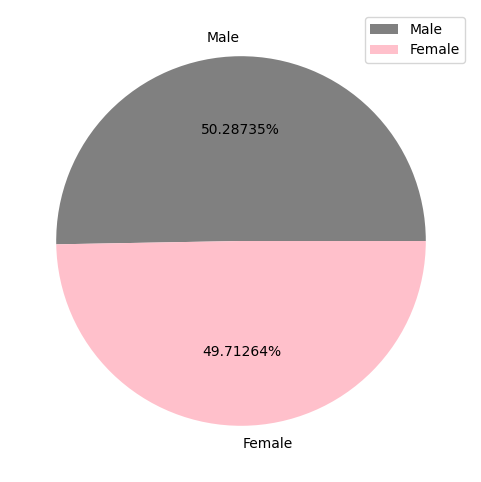

In [14]:
plt.figure(figsize=(6,6))
plt.pie(Gender['count'], colors=['grey', 'pink'],
        shadow=False,labels=Gender['Gender'],
        autopct='%2.5f%%'
       )
plt.legend()
plt.show()


In [15]:
GenderwithAge = df.groupby('Gender')['Age'].value_counts().reset_index()
GenderwithAge

,Gender,Age,count
0,Female,43,25
1,Female,30,24
2,Female,31,24
3,Female,36,24
4,Female,41,24
5,Female,37,22
6,Female,32,9
7,Female,38,9
8,Female,42,9
9,Female,29,2


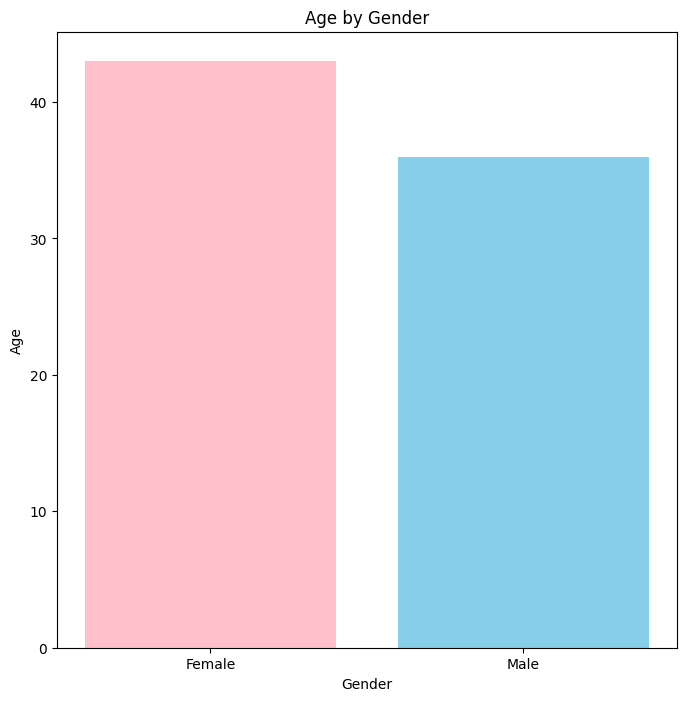

In [16]:
plt.figure(figsize=(8,8))
plt.bar(GenderwithAge['Gender'], GenderwithAge['Age'],
        color=['pink', 'skyblue'],
       )
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

# Memebership Type with Gender

In [17]:
GenderWithMembershiptype = df[['Gender','Membership Type']].value_counts().reset_index()
GenderWithMembershiptype

,Gender,Membership Type,count
0,Male,Silver,116
1,Female,Bronze,114
2,Male,Gold,59
3,Female,Gold,58
4,Female,Silver,1


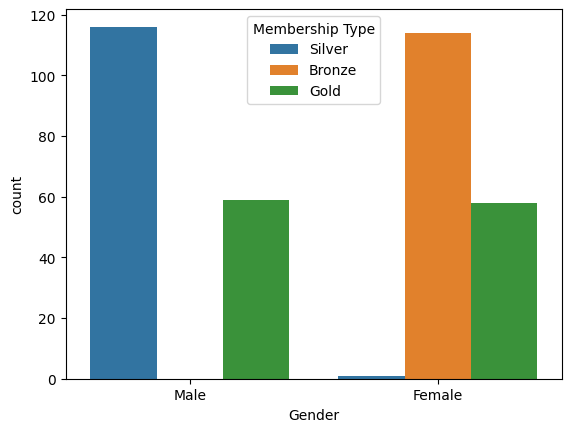

In [18]:
sns.barplot(data=GenderWithMembershiptype, x='Gender', y='count', hue='Membership Type')
plt.show()

# Number for Customers For All Ages

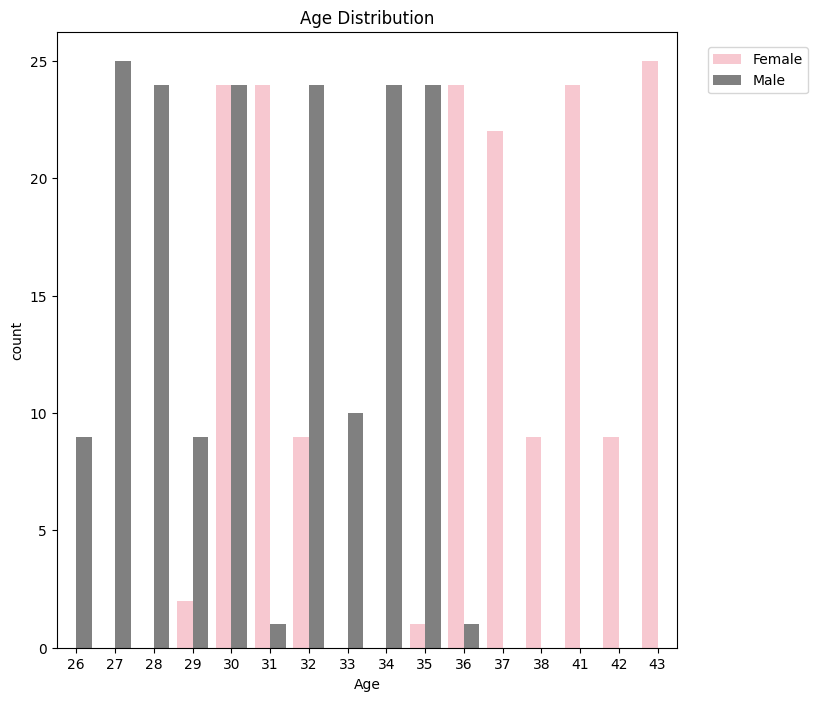

In [19]:
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index().sort_values(ascending=False, by='count')

plt.figure(figsize=(8, 8))
sns.barplot(data=gender_age_data, x='Age', y='count', hue='Gender', palette=['pink', 'grey'])
plt.title("Age Distribution")
plt.legend(loc=(1.05,0.9))
plt.show()

# Age Vs Count

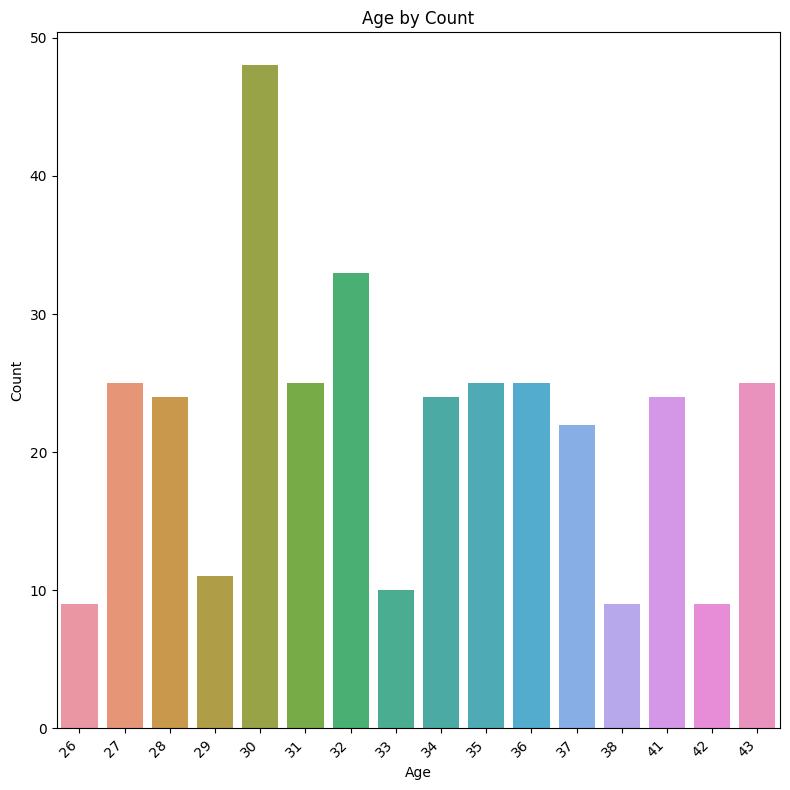

In [20]:
age_data = df['Age'].value_counts().reset_index()
plt.figure(figsize=(8, 8))
sns.barplot(data=age_data,x='Age', y='count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate the labels for better readability
plt.title('Age by Count')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# City

In [21]:
city = df['City']
city

0           New York
1        Los Angeles
2            Chicago
3      San Francisco
4              Miami
           ...      
345            Miami
346          Houston
347         New York
348      Los Angeles
349          Chicago
Name: City, Length: 348, dtype: object

# Gender with City

In [22]:
GenderwithCity = df[['Gender','City']].value_counts().reset_index()
GenderwithCity

,Gender,City,count
0,Male,Los Angeles,59
1,Female,Chicago,58
2,Female,New York,58
3,Male,San Francisco,58
4,Male,Miami,57
5,Female,Houston,56
6,Female,Miami,1
7,Male,New York,1


# City By Count

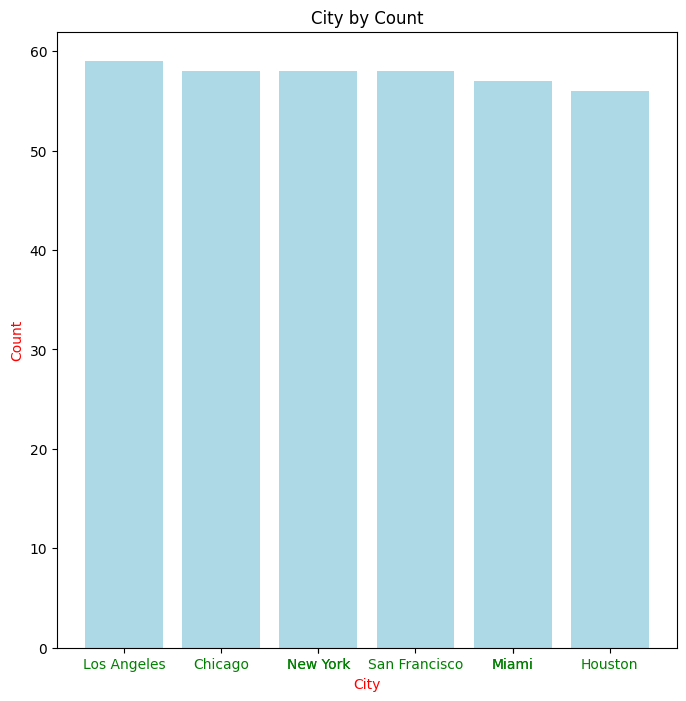

In [23]:
xticks = GenderwithCity['City']
plt.figure(figsize=(8,8))
plt.bar(GenderwithCity['City'], GenderwithCity['count'],
        color='lightblue',
       )
plt.xlabel('City',color='Red')
plt.ylabel('Count',color='Red')
plt.xticks(xticks,color='green',rotation=0)
plt.title('City by Count')
plt.show()

# Membership Type

In [24]:
MembershipType = df['Membership Type'].value_counts().reset_index()
MembershipType


,Membership Type,count
0,Gold,117
1,Silver,117
2,Bronze,114


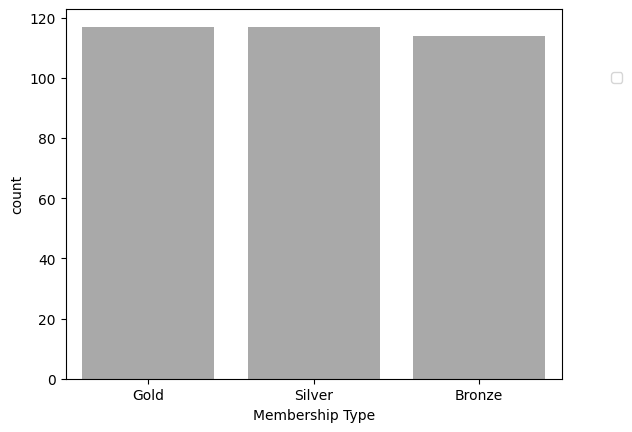

In [25]:
sns.barplot(data=MembershipType, x='Membership Type', y='count' ,palette=['darkgrey'])
plt.legend(loc=(1.1,0.8))
plt.show()

# Numbers of Customers by Memebership

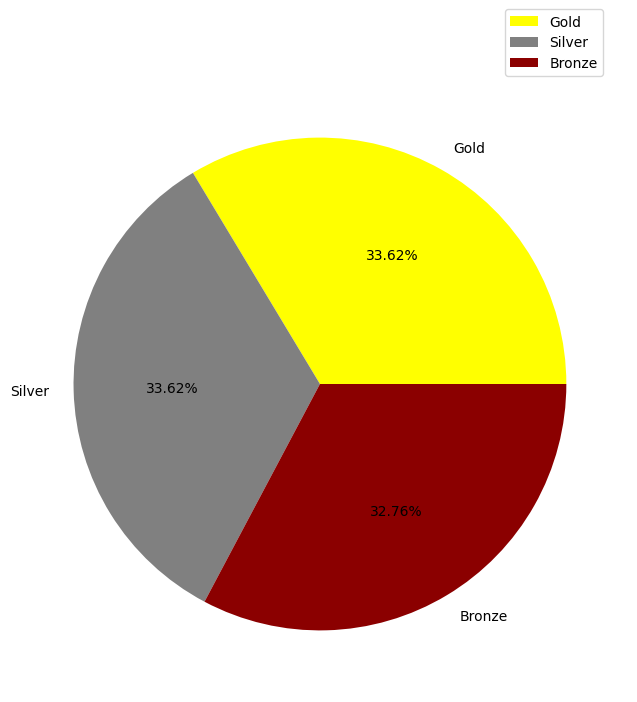

In [26]:
plt.figure(figsize=(8,8))
plt.pie(MembershipType['count'], colors=['yellow', 'grey','darkred'],labels= MembershipType['Membership Type'],
        autopct='%1.2f%%'
       )
plt.legend(loc=(0.8,1))
plt.show()

# Total Spend By Membership

In [27]:
MembershipTypeandTotalSpend = df[['Membership Type','Total Spend']].value_counts().reset_index().sort_values(by='Total Spend',ascending=True)
MembershipTypeandTotalSpend 

,Membership Type,Total Spend,count
55,Bronze,410.8,1
39,Bronze,420.8,4
59,Bronze,430.5,1
6,Bronze,430.8,11
41,Bronze,440.5,3
...,...,...,...
31,Gold,1480.1,5
73,Gold,1480.3,1
7,Gold,1490.1,11
24,Gold,1500.1,7


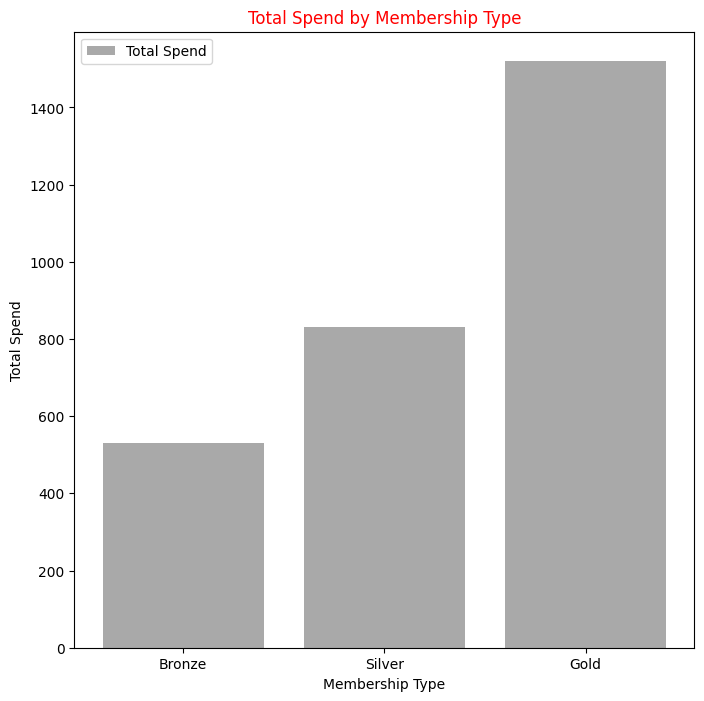

In [28]:
plt.figure(figsize=(8,8))
plt.bar(MembershipTypeandTotalSpend['Membership Type'], MembershipTypeandTotalSpend['Total Spend'], label='Total Spend',color='darkgrey')
plt.legend(loc='upper left')  
plt.xlabel('Membership Type')
plt.ylabel('Total Spend')
plt.title('Total Spend by Membership Type',color='Red')
plt.show()

In [29]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


# Distribution Days Since Last Purchase


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


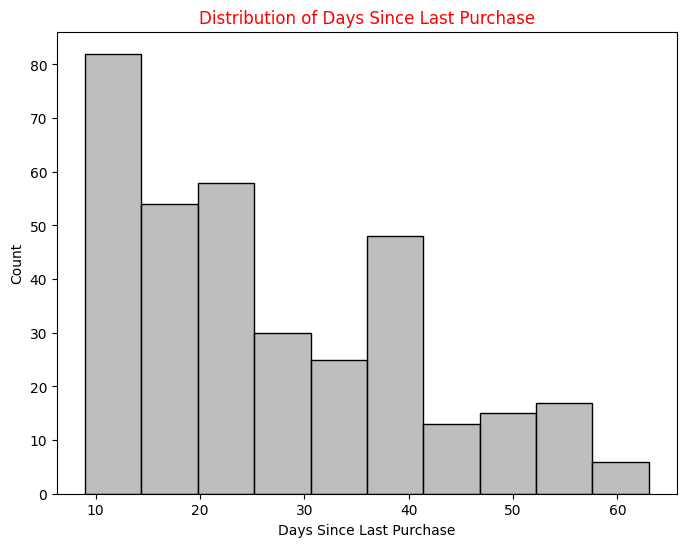

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Days Since Last Purchase'],color='darkgrey')
plt.title("Distribution of Days Since Last Purchase",color='red')
plt.show()

# Satisfaction Level

In [31]:
SatisfactionLevel = df['Satisfaction Level'].value_counts().reset_index()
SatisfactionLevel

,Satisfaction Level,count
0,Satisfied,125
1,Unsatisfied,116
2,Neutral,107


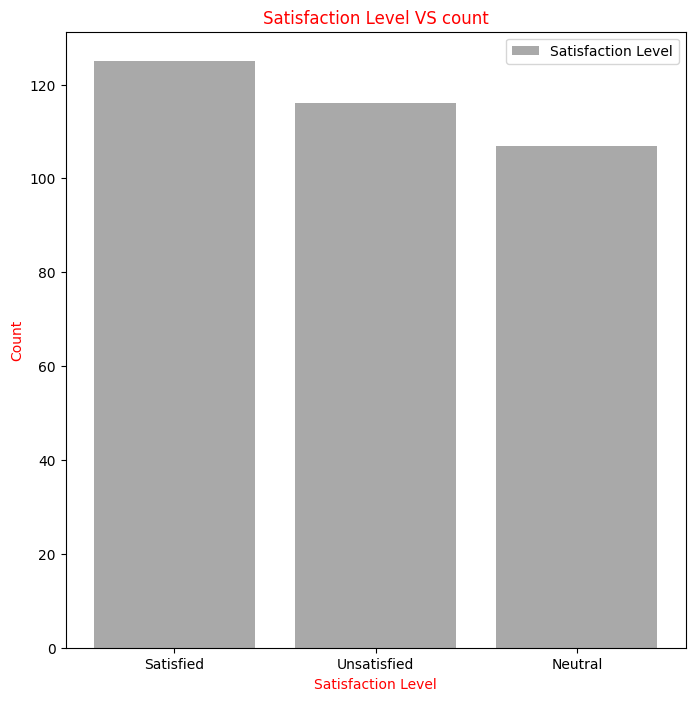

In [32]:
xticks = SatisfactionLevel['Satisfaction Level']
plt.figure(figsize=(8,8))
plt.bar(SatisfactionLevel['Satisfaction Level'], SatisfactionLevel['count'], label='Satisfaction Level',color='darkgrey')
plt.legend(loc='upper right')  # Adjust the location of the legend as needed
plt.xlabel('Satisfaction Level',color='Red')
plt.ylabel('Count',color='red')
plt.xticks(xticks)
plt.title('Satisfaction Level VS count',color='red')
plt.show()

# Satistaction Level and average spend

In [33]:
SatistactionLevelandaveragespend = df.groupby('Satisfaction Level')['Total Spend'].mean().reset_index()
SatistactionLevelandaveragespend

,Satisfaction Level,Total Spend
0,Neutral,616.414019
1,Satisfied,1280.319200
2,Unsatisfied,595.136207


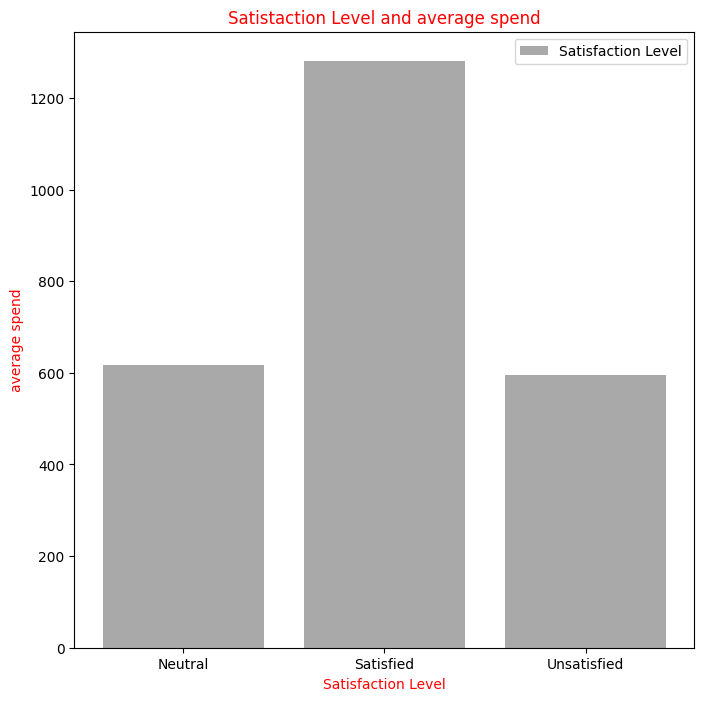

In [34]:
xticks = SatistactionLevelandaveragespend['Satisfaction Level']
plt.figure(figsize=(8,8))
plt.bar(SatistactionLevelandaveragespend['Satisfaction Level'], SatistactionLevelandaveragespend['Total Spend'], label='Satisfaction Level',color='darkgrey')
plt.legend(loc='upper right')  # Adjust the location of the legend as needed
plt.xlabel('Satisfaction Level',color='red')
plt.ylabel('average spend',color='red')
plt.xticks(xticks)
plt.title('Satistaction Level and average spend',color='red')
plt.show()